### Python EDA FINAL PROJECT

By now you should be comfortable with working on an end to end Exploratory Data Analysis in Python. For this final assignment/project, we would like you to study and pick a dataset from one of the links below. Treat the project as a business case and solve the problem. A total of **100 points** is allocated to this project.

**Datasets chosen:**

Food Chain Campaign( a bit more on statistics): https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test

**Rubric as below:**

| Section           | Criteria                                                                                                     | Points |
|-------------------|--------------------------------------------------------------------------------------------------------------|--------|
| Project Scope     | Is the project goals and objectives mentioned?                                                               | 5      |
| Analysis          | Data is cleaned and transformed properly                                                                     | 5      |
|                   | Basic metadata exploration and data columns to variable type have been mapped out clearly                   | 5      |
|                   | At least 10 questions are asked and these are related to the business case                                   | 5      |
|                   | The student has analyzed the data using univariate analysis and written his insights                         | 5      |
|                   | The student has analyzed the data using bivariate analysis and written his insights                           | 5      |
|                   | The student has analyzed the data using multivariate analysis and written his insights                         | 5      |
|                   | The student has used the correct charts and plots for each type of analysis and interpreted them correctly. At least three charts for each type of analysis | 10     |
|                   | The student has used different elements to describe the graph(labels for each axis, legend if required, title, aesthetics - styles, colors, size, etc.) | 5      |
|                   | Use of statistics - Measures of central tendency (mean, median, mode, quartiles), spread (standard deviation, variance, range, IQR), Shape (Kurtosis, Skewness, and Modality), and Frequencies, Co-occurrences, and/or other statistical analysis method | 5      |
| Code Quality      | No errors produced while running the notebook, code is readable                                              | 10     |
| Overall conclusions| At least 3 important insights and final conclusions are included.                                           | 20     |
|                   | The insights should be interesting enough instead of just out of common sense.                              |        |
|                   | The conclusions are drawn logically and reasonably without logic fallacy                                    | 5      |
|                   | The project included potential actions or next steps that could be taken, based on the analysis                | 10     |


---------------------------------------------------------

# Fast Food Marketing Campaign A/B Test

**About data**

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

**Objective:** 

Evaluate A/B testing results and decide which marketing strategy works the best and has statistically significantly differences among the test groups to increase sales.

Hypothesis:

1.  

2. 

3. Does different promotions result in significantly different sales outcomes (SalesInThousands)?

4. 

In [1]:
import pandas
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
!python --version

Python 3.9.0


In [3]:
!pip --version

pip 23.1.2 from C:\Users\yongsheng.tan\AppData\Local\miniconda3\envs\quant_lab\lib\site-packages\pip (python 3.9)



In [4]:
%matplotlib inline

## Data Cleaning

In [5]:
df = pandas.read_csv("WA_Marketing-Campaign.csv")
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [6]:
# change data type of dataframe
category_variable = ["MarketID", "MarketSize", "LocationID","Promotion","week"]

df2 = df.copy()
df2[category_variable] = df2[category_variable].astype("category")

In [151]:
# check metadata
print(df2.dtypes)

MarketID            category
MarketSize          category
LocationID          category
AgeOfStore             int64
Promotion           category
week                category
SalesInThousands     float64
dtype: object


In [150]:
# check if there is any missing values
df2.isna().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [9]:
# check if any row of records is duplicated
df2.duplicated().sum()

0

## Analysis

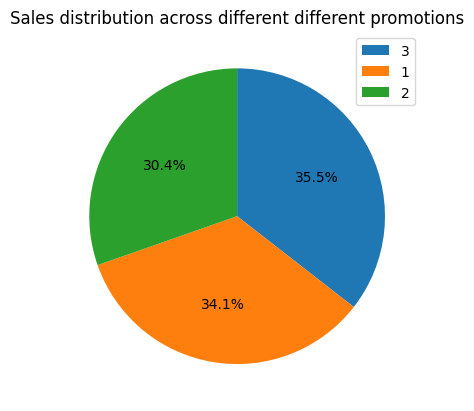

In [77]:
# groupping data by Promotion
sales_by_promotion = df2.groupby("Promotion")["SalesInThousands"].sum(
    ).reset_index().sort_values("SalesInThousands", ascending=False)
plt.pie(x=sales_by_promotion["SalesInThousands"], autopct="%1.1f%%", 
        startangle=90, counterclock=False)

plt.title("Sales distribution across different different promotions")
plt.legend(sales_by_promotion["Promotion"], loc="upper right")
plt.show()

Explanation: 

----

Using a boxplot to visualize the distribution of sales helps in understanding the central tendency, spread, and potential outliers across different promotion types. It provides a concise summary of the sales data distribution, making it easier to compare the impact of various promotions on sales.

MarketSize    Large   Medium    Small
Promotion                            
1           4213.21  4576.57  1203.25
2           3860.61  4224.35   812.97
3           3705.79  5274.39  1428.34 



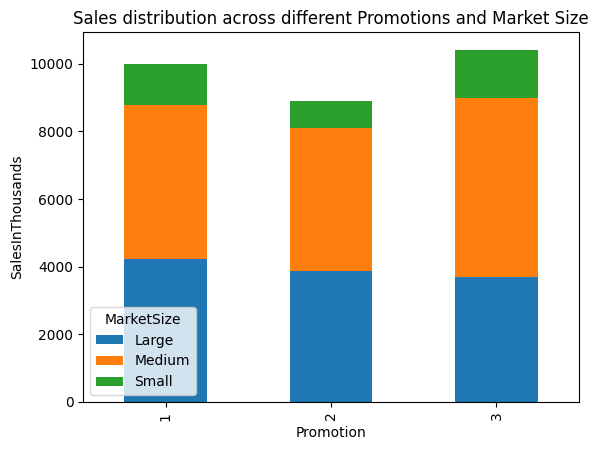

In [76]:
# Group the DataFrame by "Promotion" and "MarketSize" and 
# calculate the sum of "SalesInThousands" for each group
sales_by_promotion_and_marketsize = df2.groupby(["Promotion","MarketSize"]
                            )["SalesInThousands"].sum().reset_index()

# Create a pivot table to reshape the data
pivot_df = sales_by_promotion_and_marketsize.pivot(
    index="Promotion", columns="MarketSize", 
    values="SalesInThousands")
print(pivot_df, "\n")

# plot stacked bar chart
pivot_df.plot(kind="bar",stacked=True)
plt.ylabel("SalesInThousands")
plt.title("Sales distribution across different Promotions and Market Size")
plt.show()

**ANOVA**

In [114]:
from scipy.stats import f_oneway

# H0: All group means are equal.
# H1: At least one group mean is different.
promo_1 = df2.loc[df2["Promotion"]==1,"SalesInThousands"]
promo_2 = df2.loc[df2["Promotion"]==2,"SalesInThousands"]
promo_3 = df2.loc[df2["Promotion"]==3,"SalesInThousands"]

f_stat, p_value = f_oneway(promo_1,promo_2,promo_3)
print(f"p value: %.4f" % p_value)

p value: 0.0000


**Post-hoc t-Tests**

In [147]:
from scipy.stats import ttest_ind

# H0: no statistically significant difference between promotion 1 and promotion 2
# H1: significantly difference between promotion 1 and promotion 2
print(f"Mean difference between Promotion strategy 1 and Promotion strategy 2: {promo_1.mean() - promo_2.mean()}")
t_stat, p_value = ttest_ind(promo_1, promo_2)
print(f"p value: %.4f" % p_value)
print("\n")

# H0: no statistically significant difference between promotion 1 and promotion 3
# H1: significantly difference between promotion 1 and promotion 3
print(f"Mean difference between Promotion strategy 1 and Promotion strategy 3: {promo_1.mean() - promo_3.mean()}")
t_stat, p_value = ttest_ind(promo_1, promo_3)
print(f"p value: %.4f" % p_value)
print("\n")

# H0: no statistically significant difference between promotion 2 and promotion 3
# H1: significantly difference between promotion 2 and promotion 3
print(f"Mean difference between Promotion strategy 1 and Promotion strategy 3: {promo_2.mean() - promo_3.mean()}")
t_stat, p_value = ttest_ind(promo_2, promo_3)
print(f"p value: %.4f" % p_value)

Mean difference between Promotion strategy 1 and Promotion strategy 2: 10.76959673428997
p value: 0.0000


Mean difference between Promotion strategy 1 and Promotion strategy 3: 2.734543542800594
p value: 0.1208


Mean difference between Promotion strategy 1 and Promotion strategy 3: -8.035053191489375
p value: 0.0000
